<a href="https://colab.research.google.com/github/ClovisDel/Classification_Auto_Churn/blob/main/ClassiChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')

from scipy import stats

from sklearn.model_selection import train_test_split

import ipywidgets as widgets



Mounted at /content/gdrive


1 - Importation de la base de donnée sous un DataFrame : 

---



In [ ]:
df_data = pd.read_csv ("/content/gdrive/My Drive/Colab Notebooks/telecom_churn_data.csv")

df_data.head()
df_data.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,...,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.0
99995,7000607688,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,112.201,...,0,NaN,NaN,NaN,NaN,2052,0.00,0.00,0.00,0.0
99996,7000087541,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,229.187,...,0,1.0,NaN,NaN,NaN,185,0.00,0.00,0.00,0.0
99997,7000498689,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,322.991,...,0,1.0,1.0,1.0,1.0,478,1445.74,1151.03,1173.18,0.0
99998,7001905007,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,687.065,...,0,1.0,NaN,NaN,NaN,751,0.00,0.00,0.00,0.0


In [ ]:
df_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


2 - Récupération des variables numériques :
  - 214 variables
  - 99999 observations

In [ ]:
df_data = df_data.select_dtypes(["number"])
print(df_data.shape)

(99999, 214)


3 - Suppression des doublons en fonction des numéros de téléphones :
  - Aucun trouvé

4 - Suppression des variables qui sont des constantes (aucune importance pour la prédiction) : 
  - circle_id
  - loc_og_t2o_mou
  - std_og_t2o_mou
  - loc_ic_t2o_mou
  
Donc : 
  - 210 variables
  - 99999 observations



In [ ]:
## Suppression des doublons 
print(df_data.shape)
df_data.drop_duplicates(subset=["mobile_number"], keep="first")
print(df_data.shape)


#Suppressions des variables qui sont des constantes 
del df_data['circle_id']
del df_data['loc_og_t2o_mou']
del df_data['std_og_t2o_mou']
del df_data['loc_ic_t2o_mou']
print(df_data.shape)

(99999, 214)
(99999, 214)
(99999, 210)


In [ ]:
5 - Transformations des NA : 


In [ ]:
missing_rate = df_data.isna().sum()/df_data.shape[0]
nom_column = df_data.columns.tolist()
colomn_del = []
valeur_del = []
for i in range(0, len(missing_rate)) : 
  if(missing_rate[i] > 0.1):
    valeur_del.append(missing_rate[i])
    colomn_del.append(nom_column[i])
    df_data.drop(nom_column[i], axis=1, inplace=True)
  else:
    #if(df_data[nom_column[i]].dtypes == "")
    df_data.fillna(df_data.median(), inplace=True)
print(colomn_del)
print(valeur_del)
print(df_data.isna().sum().sum())
print(df_data.shape)

['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']
[0.7484674846748467, 0.7442874428744287, 0.7366073660736607, 0.7407774077740777, 0.7484674846748467, 0.7442874428744287, 0.7366073660736607, 0.7407774077740777, 0.7484674846748467, 0.7442874428744287, 0.7366073660736607, 0.7407774077740777, 0.7484674846748467, 0.7442874428744287, 0.7366073660736607, 0.7407774077740777, 0.7484674846748467, 0.7442874428744287, 0.

In [ ]:
df_test = df_data
print(df_test.shape)
df_test.describe()

(99999, 174)


,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,282.987358,278.536648,279.154731,261.645069,128.534195,129.760024,127.604651,122.521442,193.934538,...,0.086341,0.074781,0.080401,0.084501,0.084581,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,328.439770,338.156291,344.474791,341.998630,291.921906,303.405800,301.385516,297.505381,311.179884,...,0.384978,0.568344,0.628334,0.660234,0.650457,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,93.411500,86.980500,84.126000,62.685000,8.030000,7.290000,7.410000,6.630000,36.720000,...,0.000000,0.000000,0.000000,0.000000,0.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,197.704000,191.640000,192.080000,176.849000,34.310000,32.330000,32.360000,29.840000,96.310000,...,0.000000,0.000000,0.000000,0.000000,0.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,371.060000,365.344500,369.370500,353.466500,112.610000,108.880000,106.740000,99.090000,222.535000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,8157.780000,10752.560000,10427.460000,8362.360000,...,11.000000,29.000000,35.000000,41.000000,49.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [ ]:
def mean_norm(df):
    return df.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df_mean_norm = mean_norm(df_test)
print(df_mean_norm)
df_mean_norm.describe()

       mobile_number    arpu_6    arpu_7  ...  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g
0          -0.523981 -0.260633 -0.188435  ...   -0.246455    0.162161    0.008659
1           0.946581 -0.757948  0.226337  ...   -0.246455   -0.236361   -0.101806
2           0.601850 -0.351046 -0.264607  ...   -0.246455   -0.219940   -0.101806
3          -0.004454 -0.187704 -0.081130  ...   -0.246455   -0.236361   -0.101806
4          -1.530580 -0.065008  0.092677  ...   -0.246455   -0.236361   -0.101806
...              ...       ...       ...  ...         ...         ...         ...
99994       0.491155 -0.805373 -0.619168  ...   -0.246455   -0.236361   -0.101806
99995      -0.861878 -0.519993 -0.593588  ...   -0.246455   -0.236361   -0.101806
99996      -1.609571 -0.163806 -0.823692  ...   -0.246455   -0.236361   -0.101806
99997      -1.018561  0.121799  0.073485  ...    3.997727    4.383581   -0.101806
99998       1.002972  1.230294 -0.823692  ...   -0.246455   -0.236361   -0.101806

[99999 rows x 1

In [ ]:
def outliers(df, nom_column):
  
  Q1 = df[nom_column].quantile(0.25)
  Q3 = df[nom_column].quantile(0.75)
  IQR = Q3 - Q1

  lb = Q1 - 1.5 * IQR
  ub = Q3 + 1.5 * IQR
  
  ls = df.index[ (df[nom_column] < lb) | (df[nom_column] > ub)]
  print(len(ls))
  
  return ls

def remove(df, list_to_del):
  list_to_del = sorted(set(list_to_del))
  df = df.drop(list_to_del)
  return df

print("Old shape : ", df_data.shape)
nom_column = df_mean_norm.columns.tolist()
index_list = []
for element in nom_column :
  index_list.extend(outliers(df_mean_norm, element))
print(index_list)

#df_data = remove(df_data, index_list)

print("New shape : ", df_data.shape)

Dropdown(options=('mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onne…

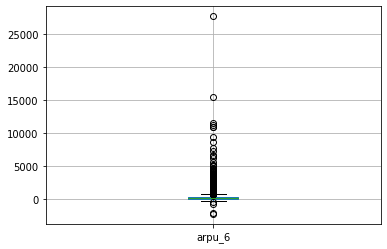

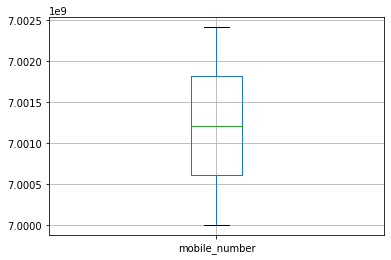

In [ ]:
nom_column = df_data.columns.tolist()
dropdown_nom_column = widgets.Dropdown(options = nom_column)
output_boxplot = widgets.Output()

def dropdown_eventhandler(change):
  output_boxplot.clear_output()
  with output_boxplot:
    display(df_data.boxplot(column=dropdown_nom_column.value, return_type='axes'))

dropdown_nom_column.observe(dropdown_eventhandler, names="value")
display(dropdown_nom_column)

In [ ]:
conditions = [ 
  (df_data['total_ic_mou_9'] == 0) | 
  (df_data['total_og_mou_9'] == 0) &
  (df_data['vol_2g_mb_9'] == 0) |
  (df_data['vol_3g_mb_9'] == 0),

  (df_data['total_ic_mou_9'] >= 1) | 
  (df_data['total_og_mou_9'] >= 1) &
  (df_data['vol_2g_mb_9'] >= 1) |
  (df_data['vol_3g_mb_9'] >= 1)

]

values = [1,0]

df_data['churner'] = np.select(conditions, values)

df_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churner
0,7000842753,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,...,0,0,0,0,968,30.4,0.0,101.20,3.58,1
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,...,0,0,0,0,1006,0.0,0.0,0.00,0.00,1
2,7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,...,0,0,0,0,1103,0.0,0.0,4.17,0.00,0
3,7001204172,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,...,0,0,0,0,2491,0.0,0.0,0.00,0.00,1
4,7000142493,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,...,0,0,0,0,1526,0.0,0.0,0.00,0.00,1


In [ ]:
print("Old shape : ", df_data.shape)
list_name = df_data.columns.tolist()
list_to_del = [var_name for var_name in list_name if var_name[-2:] == "_9"]
print(list_to_del)
print(len(list_to_del))
df_data.drop(list_to_del, 1, inplace=True)

print("New shape : ", df_data.shape)

Old shape :  (99999, 175)
['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']
42
New shape :  (99999, 133)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
trainset, testset = train_test_split(df_data, test_size=0.2, random_state=0)

print(trainset.shape, testset.shape)

(79999, 133) (20000, 133)


In [ ]:
trainset.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churner
10382,7001983532,100.498,82.600,33.599,41.94,34.13,20.81,81.58,43.49,26.76,...,0,0,0,0,1842,0.00,0.00,0.00,0.00,1
73170,7000611373,157.536,239.603,276.519,44.21,72.54,135.99,99.96,142.84,105.78,...,0,0,0,0,1423,0.00,0.00,0.00,0.00,1
30938,7001516202,1745.761,1790.522,2326.899,316.41,249.68,253.04,530.46,784.98,720.68,...,0,0,0,1,250,497.84,73.79,32.36,42.69,0
99309,7002327120,319.636,416.262,226.704,32.64,11.89,4.11,42.08,20.59,18.28,...,1,0,0,0,1473,462.41,697.34,630.15,0.00,0
58959,7002071190,81.522,105.932,182.620,11.69,61.56,59.71,22.18,26.21,45.98,...,0,0,0,0,2423,0.00,0.00,0.00,0.00,1


In [ ]:
testset.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churner
3582,7002321808,275.482,492.990,580.982,220.78,483.09,692.59,16.36,156.11,27.89,...,0,0,0,0,860,0.0,0.0,0.0,0.0,1
60498,7002006298,104.390,202.225,0.000,18.51,14.51,32.36,81.86,110.71,92.14,...,0,0,0,0,410,0.0,0.0,0.0,0.0,1
53227,7002358170,130.871,149.752,155.070,20.54,50.59,96.59,120.09,196.93,182.56,...,0,0,0,0,622,0.0,0.0,0.0,0.0,1
21333,7000649592,86.850,55.203,28.261,15.63,10.81,6.63,69.29,37.46,18.46,...,0,0,0,0,652,0.0,0.0,0.0,0.0,1
3885,7000751776,84.544,4.350,70.984,20.98,0.35,15.84,113.09,4.19,56.96,...,0,0,0,0,1023,0.0,0.0,0.0,0.0,1


In [ ]:
file_name_test = "churner_test_data_set.csv"

file_name_train = "churner_train_data_set.csv"

trainset.to_csv(file_name_train, index=False)
testset.to_csv(file_name_test, index=False)

files.download(file_name_test)
files.download(file_name_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>